### PCA on iris dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df

,Id,sep_len,sep_wid,pet_len,pet_wid,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
from sklearn.preprocessing import StandardScaler
variables = ['sep_len', 'sep_wid', 'pet_len', 'pet_wid']
X = df.loc[:, variables].values
y = df.loc[:, ['species']].values
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)

In [5]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X)
x_pca = pd.DataFrame(x_pca)

In [6]:
print("Explained variance:", pca.explained_variance_)
print("Proportion of variance explained:", pca.explained_variance_ratio_)
import numpy as np
out_sum = np.cumsum(pca.explained_variance_ratio_)
print("Cummulative Prop. variance explained:", out_sum)

x_pca['species'] = y
x_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'species']
print(x_pca.head())

Explained variance: [2.93035378 0.92740362 0.14834223 0.02074601]
Proportion of variance explained: [0.72770452 0.23030523 0.03683832 0.00515193]
Cummulative Prop. variance explained: [0.72770452 0.95800975 0.99484807 1.        ]
        PC1       PC2       PC3       PC4      species
0 -2.264542  0.505704 -0.121943 -0.023073  Iris-setosa
1 -2.086426 -0.655405 -0.227251 -0.103208  Iris-setosa
2 -2.367950 -0.318477  0.051480 -0.027825  Iris-setosa
3 -2.304197 -0.575368  0.098860  0.066311  Iris-setosa
4 -2.388777  0.674767  0.021428  0.037397  Iris-setosa


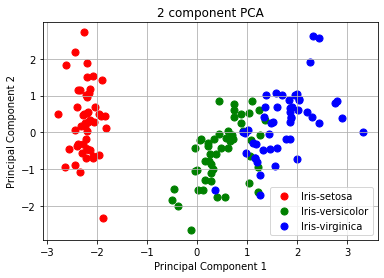

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')
specie_s = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for species, color in zip(specie_s, colors):
    indicesToKeep = x_pca['species']==species
    ax.scatter(x_pca.loc[indicesToKeep, 'PC1'],
              x_pca.loc[indicesToKeep, 'PC2'],
              c = color,
              s = 50)
ax.legend(specie_s)
ax.grid()
plt.show()

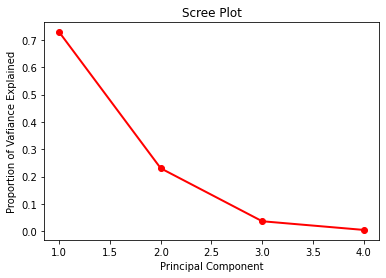

In [8]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Vafiance Explained')
plt.show()

In [9]:
loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3',
                                                     'PC4'], 
                        index = X.columns )
print(loadings)

        PC1       PC2       PC3       PC4
0  0.522372  0.372318 -0.721017 -0.261996
1 -0.263355  0.925556  0.242033  0.124135
2  0.581254  0.021095  0.140892  0.801154
3  0.565611  0.065416  0.633801 -0.523546
